<a href="https://colab.research.google.com/github/whaldsz/deep-learning/blob/main/Disease_Indicators_Prediction_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Disease Prediction



## Setup and initialization

In [1]:
#from google.colab import drive
#drive.mount('/content/drive/')


In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import math
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from keras.utils.vis_utils import plot_model
import os

#print("TensorFlow version::", tf.__version__)


## Load dataset

In [3]:
disease_training = pd.read_csv('C:/Users\whald/Google Drive/projects/oman-gulf-college/dataset/Disease_Prediction/Training.csv')
disease_testing = pd.read_csv('C:/Users/whald/Google Drive/projects/oman-gulf-college/dataset/Disease_Prediction/Testing.csv')
disease_training.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


#3 Remove last column

In [4]:
disease_training.isna().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [5]:
disease_training.drop('Unnamed: 133', inplace=True, axis=1)

disease_training.isna().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [6]:
disease_training.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


## Convert category to numeric values

In [7]:
#get class labels

class_names = np.unique(disease_training.prognosis)
disease_training.prognosis = pd.Categorical(disease_training.prognosis)
disease_testing.prognosis = pd.Categorical(disease_testing.prognosis)
class_names.shape

(41,)

In [8]:
#disease_training.prognosis.cat.codes
#disease_training
disease_testing.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


## Separate Features and Label - Training

### Training Set

In [9]:
X = disease_training.drop('prognosis', axis=1)
y = disease_training.prognosis.cat.codes
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40], dtype=int8)

### Unseen Test Set

In [10]:
X_unseen = disease_testing.drop('prognosis', axis=1)
y_unseen = disease_testing.prognosis.cat.codes
np.unique(X_unseen)

array([0, 1], dtype=int64)

## Split into Training & Validation Test

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=74)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3936, 132)
(3936,)
(984, 132)
(984,)


In [12]:
X_test

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
4007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4462,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3280,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Build Model

In [13]:
tf.random.set_seed(74)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(41, activation=tf.keras.activations.softmax)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                #metrics=['MultiClassConfusionMatrixPlot'])
                metrics=["accuracy"])

scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

history = model.fit(X_train, y_train, epochs=40, callbacks=[scheduler])


Epoch 1/40
123/123 [==============================] - 1s 4ms/step - loss: 3.7495 - accuracy: 0.0028 - lr: 1.0000e-04
Epoch 2/40
123/123 [==============================] - 0s 4ms/step - loss: 3.7270 - accuracy: 0.0056 - lr: 1.1220e-04
Epoch 3/40
123/123 [==============================] - 0s 3ms/step - loss: 3.7084 - accuracy: 0.0363 - lr: 1.2589e-04
Epoch 4/40
123/123 [==============================] - 0s 4ms/step - loss: 3.6931 - accuracy: 0.0379 - lr: 1.4125e-04
Epoch 5/40
123/123 [==============================] - 0s 3ms/step - loss: 3.6754 - accuracy: 0.0366 - lr: 1.5849e-04
Epoch 6/40
123/123 [==============================] - 0s 4ms/step - loss: 3.6508 - accuracy: 0.0206 - lr: 1.7783e-04
Epoch 7/40
123/123 [==============================] - 0s 4ms/step - loss: 3.6147 - accuracy: 0.0211 - lr: 1.9953e-04
Epoch 8/40
123/123 [==============================] - 1s 4ms/step - loss: 3.5641 - accuracy: 0.0206 - lr: 2.2387e-04
Epoch 9/40
123/123 [==============================] - 0s 4ms/ste

In [14]:
## Find the ideal learning rate

Text(0.5, 1.0, 'Learning Rate vs Loss')

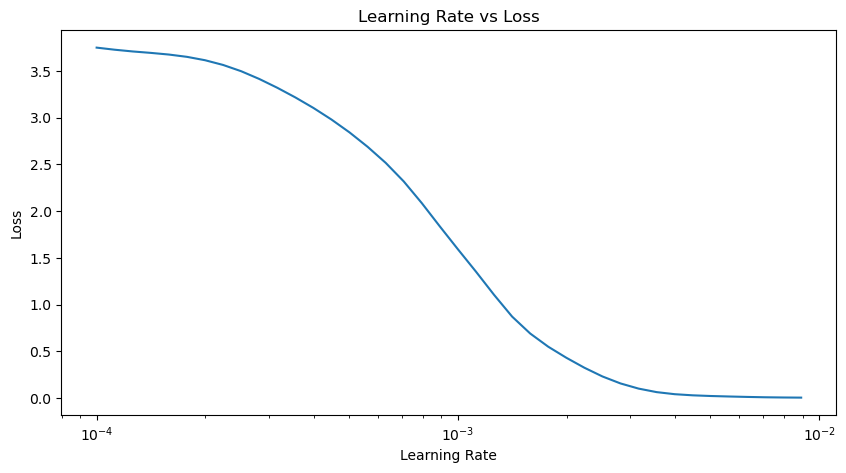

In [15]:
lrs = 1e-4 * (10 ** (tf.range(40)/20))
plt.figure(figsize=(10,5))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

## Evaluate Model

### Evaluate with test data

In [16]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Model Loss (Test Set) : {loss}")
print(f"Model Accuracy (Test Set): {acc}")

31/31 [==============================] - 0s 2ms/step - loss: 0.0043 - accuracy: 1.0000
Model Loss (Test Set) : 0.00425441050902009
Model Accuracy (Test Set): 1.0


### Evaluate with unseen data

In [17]:
loss, acc = model.evaluate(X_unseen, y_unseen)
print(f"Model Loss (Unseen Data Set) : {loss}")
print(f"Model Accuracy (Unseen Data Set): {acc}")

2/2 [==============================] - 0s 6ms/step - loss: 1.8160 - accuracy: 0.9762
Model Loss (Unseen Data Set) : 1.8160432577133179
Model Accuracy (Unseen Data Set): 0.976190447807312


## Make predictions with the model

### Test Set

In [18]:
### Test set
predictions = model.predict(X_test)
predictions[0]

31/31 [==============================] - 0s 2ms/step


array([7.7948481e-19, 5.4120488e-22, 4.2529734e-08, 1.1098175e-06,
       0.0000000e+00, 2.8220503e-35, 1.5149674e-06, 0.0000000e+00,
       9.3603450e-07, 1.6609409e-36, 1.4318044e-04, 1.1477149e-09,
       1.9208323e-21, 2.6998897e-17, 1.4405483e-28, 0.0000000e+00,
       7.7683970e-12, 0.0000000e+00, 3.5418881e-19, 0.0000000e+00,
       1.0905370e-11, 9.1653186e-28, 2.7981111e-29, 0.0000000e+00,
       6.6770629e-26, 0.0000000e+00, 0.0000000e+00, 1.3347743e-04,
       5.2547608e-18, 4.1242572e-18, 0.0000000e+00, 1.5669244e-10,
       8.0026270e-14, 4.3437581e-24, 1.5714033e-12, 4.7127945e-35,
       2.4298491e-26, 7.5745086e-18, 2.8711341e-33, 9.9971986e-01,
       0.0000000e+00], dtype=float32)

In [19]:
result = class_names[tf.argmax(predictions, axis=1)]


### Unseen Test Data

In [20]:
prediction_unseen_data = model.predict(X_unseen)
prediction_unseen_data

2/2 [==============================] - 0s 4ms/step


array([[1.29723679e-13, 0.00000000e+00, 6.37774226e-23, ...,
        8.26876225e-37, 1.69837485e-29, 7.53390452e-08],
       [1.23588960e-11, 1.23019466e-24, 4.10652781e-18, ...,
        1.26760751e-35, 5.48770743e-17, 1.76115691e-10],
       [1.28950123e-04, 0.00000000e+00, 6.86902858e-05, ...,
        4.99091632e-17, 7.28576237e-19, 4.79498252e-30],
       ...,
       [2.05450015e-11, 1.38972206e-27, 1.35573504e-17, ...,
        1.61941999e-37, 6.99923907e-15, 8.32060895e-18],
       [4.55218618e-09, 2.62399451e-33, 6.08350820e-06, ...,
        1.68510610e-22, 2.84666399e-04, 3.02959579e-38],
       [3.93134360e-05, 2.61079274e-29, 2.99296138e-04, ...,
        1.13348392e-21, 1.33797363e-03, 4.02387509e-27]], dtype=float32)

In [21]:
result = class_names[tf.argmax(prediction_unseen_data, axis=1)]
result

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo', 'Impetigo'],
      dtype=object)

## Correlation Matrix

In [22]:
#plt.figure(figsize=(25,12))

#sns.heatmap(disease_training.corr().abs(), annot=True)
